In [25]:
from sklearn.datasets import fetch_openml
from sklearn import datasets 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from time import time

# TP 1 Apprentissage supervisé    

## Jeux de données 

### Exercice 1: Manipulation de la base de données 

In [26]:
mnist = fetch_openml('mnist_784',as_frame=False) 
print(mnist) 

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [27]:
print (mnist.data) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
print (mnist.target) 

['5' '0' '4' ... '4' '5' '6']


In [29]:
len(mnist.data) 

70000

In [30]:
help(len)     

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [31]:
print (mnist.data.shape) 

(70000, 784)


In [32]:
print (mnist.target.shape) 

(70000,)


In [33]:
mnist.data[0] 

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [34]:
mnist.data[0][1] 

0.0

In [35]:
mnist.data[:,1] 

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
mnist.data[:100] 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

0


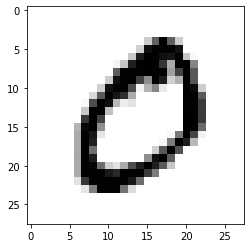

In [37]:
#On coupe notre data en matrices de 28*28 
images = mnist.data.reshape((-1, 28, 28)) 
print(mnist.target[1])
plt.imshow(images[1],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 

## La méthode des k-plus proches voisins (rappel) 

### Exercice 2: La méthode des k-nn

In [38]:
#On tire au hasard 5000 entier entre 0 et 70000 qui nous permettrons
#d'échantillonner les données
indices = np.random.randint(70000, size=5000)

#echantillon=[]
#echantillon_target=[]
echantillon = mnist.data[indices]
echantillon_target = mnist.target[indices]

#On construit notre échantillon
"""for i in data:
    echantillon.append(mnist.data[i])
    echantillon_target.append(mnist.target[i])
"""
xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=0.8)

#Entrainement d'un classifieur avec k=10
clf = KNeighborsClassifier(10)
clf.fit(xtrain, ytrain)
prediction = clf.predict([xtest[4]])
print("Prediction : ",prediction)
print("Réalité : ",ytest[4])
taux_erreur=1-clf.score(xtest, ytest)
print("Taux d'erreur : ",taux_erreur)
print("Efficacité : ",clf.score(xtest, ytest))

Prediction :  ['7']
Réalité :  7
Taux d'erreur :  0.07299999999999995
Efficacité :  0.927


k =  2 , score: 0.941
k =  3 , score: 0.937
k =  4 , score: 0.94
k =  5 , score: 0.934
k =  6 , score: 0.934
k =  7 , score: 0.935
k =  8 , score: 0.933
k =  9 , score: 0.928
k =  10 , score: 0.927
k =  11 , score: 0.928
k =  12 , score: 0.922
k =  13 , score: 0.919
k =  14 , score: 0.918
Meilleur k : 2


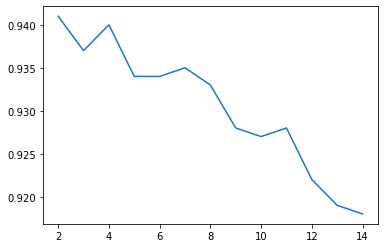

In [39]:
meilleur_score=0
meilleur_k=0
score_list = []
values_of_k = range(2,15)
for k in range(2,15):
    clf = KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    score=clf.score(xtest, ytest)
    score_list.append(score)
    if score>meilleur_score:
        meilleur_score=score
        meilleur_k=k
    print("k = ", k, ', score:',clf.score(xtest, ytest))
print('Meilleur k :',meilleur_k)


plt.plot(values_of_k,score_list)
plt.show()

k = 2 , Score :  0.9134078212290503
k = 3 , Score :  0.9245810055865922
k = 4 , Score :  0.9215686274509803
k = 5 , Score :  0.927170868347339
k = 6 , Score :  0.9243697478991597
k = 7 , Score :  0.938375350140056
k = 8 , Score :  0.9327731092436975
k = 9 , Score :  0.927170868347339
k = 10 , Score :  0.9411764705882353
k = 11 , Score :  0.9355742296918768
k = 12 , Score :  0.9103641456582633
k = 13 , Score :  0.9215686274509803
k = 14 , Score :  0.9299719887955182
k = 15 , Score :  0.9243697478991597


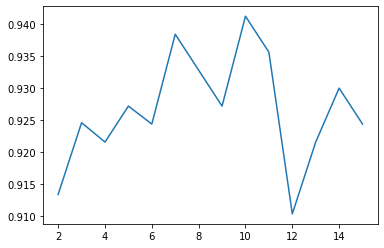

In [40]:
#for i in range(5,10):
kf=KFold(n_splits=14)
score=0
k=2
values_of_k = range(2,16)
score_list = []
for train_index, test_index in kf.split(echantillon):
    #print(type(train_index[0]))
    #print("TRAIN:", train_index, "\nTEST:", test_index)
    #print(echantillon[[0,1,2]])
    X_train, X_test = echantillon[train_index], echantillon[test_index]
    y_train, y_test = echantillon_target[train_index], echantillon_target[test_index]
    
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    score=clf.score(X_test, y_test)
    score_list.append(score)
    #print('score:',clf.score(xtest, ytest))
    print('k =',k, ', Score : ', score)
    k+=1
    
    
plt.plot(values_of_k,score_list)
plt.show()

Meilleur k score pour i= 0.5 : 0.9188
Meilleur k score pour i= 0.6 : 0.9205
Meilleur k score pour i= 0.7 : 0.9286666666666666
Meilleur k score pour i= 0.7999999999999999 : 0.9400599400599401
Meilleur k score pour i= 0.8999999999999999 : 0.95


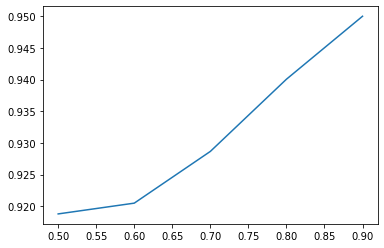

In [41]:
#Variation taille de train et test
values_of_i = np.arange(0.5,1,0.1)
score_list = []
for i in np.arange(0.5,1,0.1):
    xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=i)                                               
    meilleur_score=0
    meilleur_k=0
    for k in range(2,16):
        clf = KNeighborsClassifier(k)
        clf.fit(xtrain, ytrain)
        clf.predict(xtest)
        score=clf.score(xtest, ytest)
        if score>meilleur_score:
            meilleur_score=score
            meilleur_k=k
    score_list.append(meilleur_score)
        #print('score:',clf.score(xtest, ytest))
    print('Meilleur k score pour i=',i,':',meilleur_score)    

plt.plot(values_of_i,score_list)
plt.show()

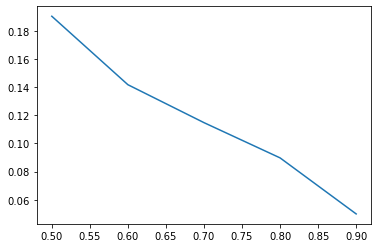

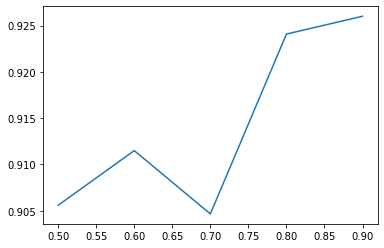

In [42]:
values_of_train = np.arange(0.5,1,0.1)

score_list = []
execution_time = []
for i in values_of_train : 
    xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=i)                                               

    clf = KNeighborsClassifier(10)
    begin = time()
    clf.fit(xtrain, ytrain)
    clf.predict(xtest)
    end = time()
    total_time = end - begin
    score=clf.score(xtest, ytest)
    score_list.append(score)
    execution_time.append(total_time)
 
plt.plot(values_of_train,execution_time)
plt.show()
plt.plot(values_of_train,score_list)
plt.show() 

Meilleur pourcentage est celui de 90%

Taille échantillon : 5000 Précision : 0.926
Taille échantillon : 6000 Précision : 0.925
Taille échantillon : 7000 Précision : 0.9364285714285714
Taille échantillon : 8000 Précision : 0.9375
Taille échantillon : 9000 Précision : 0.9283333333333333
Taille échantillon : 10000 Précision : 0.9325


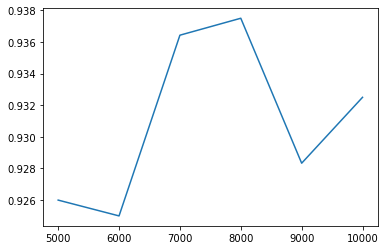

In [43]:
values_of_size = range(5000,11000,1000)
precision_list = []
for k in range(5000,11000,1000):
    indices = np.random.randint(70000, size=k)
   
    echantillon=mnist.data[indices]
    echantillon_target=mnist.target[indices]

    xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=0.8)

    clf = KNeighborsClassifier(10)
    clf.fit(xtrain, ytrain)
    prediction = clf.predict([xtest[4]])
    precision=clf.score(xtest, ytest)
    precision_list.append(precision)
    #print(prediction)
    #print(ytest[4])
    print("Taille échantillon :" ,k ,"Précision :", precision)
    
plt.plot(values_of_size,precision_list)
plt.show()

In [44]:
#Variation des distances 
indices = np.random.randint(70000, size=5000)

echantillon=mnist.data[indices]
echantillon_target=mnist.target[indices]

xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=0.8)

clf1 = KNeighborsClassifier(10, p=1)
clf2 = KNeighborsClassifier(10, p=2)
clf1.fit(xtrain, ytrain)
clf2.fit(xtrain, ytrain)
precision1=clf1.score(xtest, ytest)
precision2=clf2.score(xtest, ytest)
print("Précision distance 1 :", precision1)
print("Précision distance 2 :", precision2)

Précision distance 1 : 0.907
Précision distance 2 : 0.924


In [45]:
#Variation du nb jobs
for i in [1,-1]:

    clf = KNeighborsClassifier(10,n_jobs=i)

    clf.fit(xtrain, ytrain)
    time_start = time()
    prediction = clf.predict(xtest)
    time_stop = time()
    score = clf.score(xtest, ytest)
    print("n_jobs : {}, Temps total : {}".format(i,time_stop-time_start))

n_jobs : 1, Temps total : 0.09802746772766113
n_jobs : -1, Temps total : 0.31035804748535156


score:  0.9133333333333333
time:  0.1219632625579834
score:  0.928
time:  0.09486818313598633
score:  0.9253333333333333
time:  0.11810612678527832
score:  0.9293333333333333
time:  0.11835193634033203
score:  0.9246666666666666
time:  0.11877751350402832
score:  0.9273333333333333
time:  0.11916065216064453
score:  0.9266666666666666
time:  0.12064266204833984
score:  0.9233333333333333
time:  0.11939787864685059
score:  0.922
time:  0.11909174919128418
score:  0.9226666666666666
time:  0.11896705627441406
score:  0.92
time:  0.1187899112701416
score:  0.9146666666666666
time:  0.12089967727661133
score:  0.9166666666666666
time:  0.11933112144470215
score:  0.912
time:  0.11948108673095703


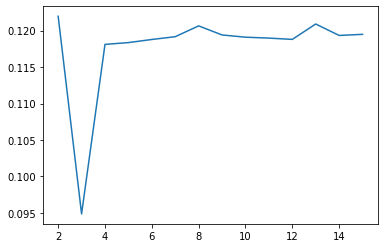

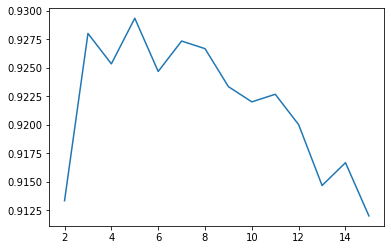

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(echantillon, echantillon_target, train_size=0.7)

# Variation de K


score=[]
execution_time=[]

values_of_k = range (2,16)

for k in values_of_k:

    clf = KNeighborsClassifier(k)

    begin = time()
    clf.fit(xtrain,ytrain)
    clf.predict(X=xtest)
    end = time()
    total_time = end - begin

    score.append(clf.score(xtest, ytest))
    execution_time.append(total_time)
    print("score: ", clf.score(xtest, ytest))
    print("time: ", total_time)

plt.plot(values_of_k,execution_time)
plt.show()
plt.plot(values_of_k,score)
plt.show()



# TP2 - Apprentissage par perceptron multi-couche sous sklearn 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn import datasets 
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from random import *
from time import time

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False) 
#print(len(mnist.data))

In [3]:
#Pour avoir le pourcentage : (49000*100)/70000=0.7
indices = np.random.randint(70000, size=5000)

echantillon=mnist.data[indices]
echantillon_target=mnist.target[indices]
    
xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=0.7)

In [50]:
clf = MLPClassifier(hidden_layer_sizes=50).fit(xtrain, ytrain)
prediction = clf.predict(xtest)

In [51]:
print(clf.score(xtest, ytest))

0.8246666666666667


In [52]:
prediction = clf.predict([xtest[4]])
print(prediction)
print(ytest[4])

['9']
9


In [53]:
prediction = clf.predict(xtest)
precision= metrics.precision_score(ytest, prediction,average='micro')
print(precision)

0.8246666666666667


In [4]:
#On créé des couches de 10 neurones à chaque fois
liste_neurones=[10]
score_list = []
for i in np.arange(2,100,5):
    liste_neurones.append(10)
    clf = MLPClassifier(hidden_layer_sizes=liste_neurones).fit(xtrain, ytrain)
    score_list.append(clf.score(xtest, ytest))
    print('Pour', i, " couches :", clf.score(xtest, ytest))
    

/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pour 2  couches : 0.5833333333333334


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pour 7  couches : 0.7526666666666667


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pour 12  couches : 0.5886666666666667
Pour 17  couches : 0.8073333333333333
Pour 22  couches : 0.7566666666666667
Pour 27  couches : 0.82
Pour 32  couches : 0.7946666666666666
Pour 37  couches : 0.8373333333333334
Pour 42  couches : 0.8026666666666666
Pour 47  couches : 0.8286666666666667
Pour 52  couches : 0.7813333333333333
Pour 57  couches : 0.814
Pour 62  couches : 0.786
Pour 67  couches : 0.822
Pour 72  couches : 0.7193333333333334
Pour 77  couches : 0.7673333333333333
Pour 82  couches : 0.8266666666666667
Pour 87  couches : 0.7853333333333333
Pour 92  couches : 0.8426666666666667
Pour 97  couches : 0.74


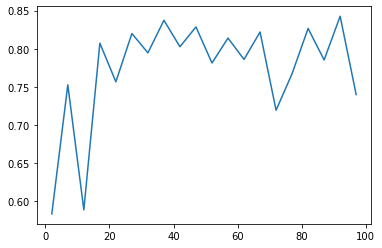

In [5]:
values_of_couches = np.arange(2,100,5)
plt.plot(values_of_couches,score_list)
plt.show()

Prédiction : 9, Valeur : 9, Efficacité : 0.8306666666666667, Précision : 0.8306666666666667
Prédiction : 9, Valeur : 9, Efficacité : 0.8373333333333334, Précision : 0.8373333333333334
Prédiction : 4, Valeur : 9, Efficacité : 0.85, Précision : 0.85
Prédiction : 9, Valeur : 9, Efficacité : 0.8646666666666667, Précision : 0.8646666666666667
Prédiction : 9, Valeur : 9, Efficacité : 0.8633333333333333, Précision : 0.8633333333333333
Prédiction : 9, Valeur : 9, Efficacité : 0.88, Précision : 0.88
Prédiction : 9, Valeur : 9, Efficacité : 0.8886666666666667, Précision : 0.8886666666666667
Prédiction : 9, Valeur : 9, Efficacité : 0.9066666666666666, Précision : 0.9066666666666666
Prédiction : 9, Valeur : 9, Efficacité : 0.8853333333333333, Précision : 0.8853333333333333
Prédiction : 9, Valeur : 9, Efficacité : 0.9146666666666666, Précision : 0.9146666666666666
Prédiction : 9, Valeur : 9, Efficacité : 0.9193333333333333, Précision : 0.9193333333333333
Prédiction : 9, Valeur : 9, Efficacité : 0.9

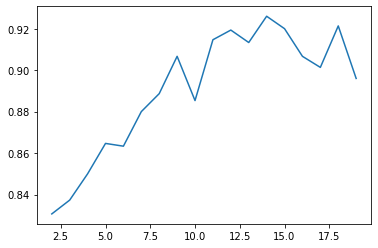

In [55]:
score_list=[]
execution_time=[]

list = [50]
nb_of_layers= range(2,20)

for i in range (2,20):

    list.append(50)

    clf = MLPClassifier(hidden_layer_sizes=tuple(list))

    clf.fit(xtrain,ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction,average='micro')
    
    score_list.append(score)
    execution_time.append(total_time)
    
    print("Prédiction : {}, Valeur : {}, Efficacité : {}, Précision : {}".format(prediction[4], ytest[4], score, precision))

plt.plot(nb_of_layers,score_list)
plt.show()

In [56]:
def create_list(nb_couches): 
    liste=[]
    for i in range(0,nb_couches):
        liste.append(randint(10,300))
    return liste
        
liste1=create_list(2)
liste2=create_list(4)
liste3=create_list(6)
liste4=create_list(8)
liste5=create_list(10)

In [57]:
precision_list = []
erreur_list = []
score_list=[]
execution_time=[]

t0 =time()
clf1 = MLPClassifier(hidden_layer_sizes=liste1).fit(xtrain, ytrain)
prediction = clf1.predict(xtest)
score1 = clf1.score(xtest, ytest)
total_time =time()-t0
precision= metrics.precision_score(ytest, prediction, average='micro')
erreur = metrics.zero_one_loss(ytest, prediction)
precision_list.append(precision)
erreur_list.append(erreur)
score_list.append(score1)
execution_time.append(total_time)
print("Score :", score1)
print("%s :\t%.2fs" % ("Modèle 1", total_time))

t0 = time()
clf2 = MLPClassifier(hidden_layer_sizes=liste2).fit(xtrain, ytrain)
prediction = clf2.predict(xtest)
score2 = clf2.score(xtest, ytest)
total_time =time()-t0
precision= metrics.precision_score(ytest, prediction, average='micro')
erreur = metrics.zero_one_loss(ytest, prediction)
precision_list.append(precision)
erreur_list.append(erreur)
score_list.append(score2)
execution_time.append(total_time)
print("Score :", score2)
print("%s :\t%.2fs" % ("Modèle 2", total_time))

t0 = time()
clf3 = MLPClassifier(hidden_layer_sizes=liste3).fit(xtrain, ytrain)
prediction = clf3.predict(xtest)
score3 = clf3.score(xtest, ytest)
total_time =time()-t0
precision= metrics.precision_score(ytest, prediction, average='micro')
erreur = metrics.zero_one_loss(ytest, prediction)
precision_list.append(precision)
erreur_list.append(erreur)
score_list.append(score3)
execution_time.append(total_time)
print("Score :", score3)
print("%s :\t%.2fs" % ("Modèle 3", total_time))

t0 = time()
clf4 = MLPClassifier(hidden_layer_sizes=liste4).fit(xtrain, ytrain)
prediction = clf4.predict(xtest)
score4 = clf4.score(xtest, ytest)
total_time =time()-t0
precision= metrics.precision_score(ytest, prediction, average='micro')
erreur = metrics.zero_one_loss(ytest, prediction)
precision_list.append(precision)
erreur_list.append(erreur)
score_list.append(score4)
execution_time.append(total_time)
print("Score :", score4)
print("%s :\t%.2fs" % ("Modèle 4", total_time))

t0 = time()
clf5 = MLPClassifier(hidden_layer_sizes=liste5).fit(xtrain, ytrain)
prediction = clf5.predict(xtest)
score5 = clf5.score(xtest, ytest)
total_time =time()-t0
precision= metrics.precision_score(ytest, prediction, average='micro')
erreur = metrics.zero_one_loss(ytest, prediction)
precision_list.append(precision)
erreur_list.append(erreur)
score_list.append(score5)
execution_time.append(total_time)
print("Score :", score5)
print("%s :\t%.2fs" % ("Modèle 5", total_time))

Score : 0.8353333333333334
Modèle 1 :	3.28s
Score : 0.8813333333333333
Modèle 2 :	3.21s
Score : 0.8893333333333333
Modèle 3 :	6.15s
Score : 0.9353333333333333
Modèle 4 :	9.21s
Score : 0.9473333333333334
Modèle 5 :	11.49s


[43, 43]
[167, 37, 52, 282]
[209, 212, 112, 36, 66, 13]
[224, 42, 247, 82, 274, 225, 247, 212]
[277, 54, 11, 159, 290, 39, 205, 45, 256, 189]


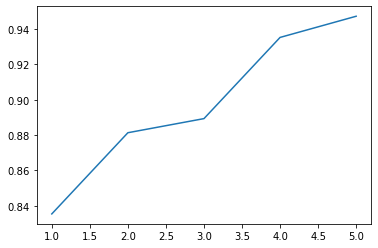

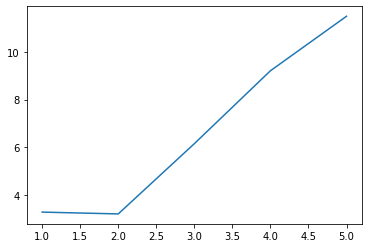

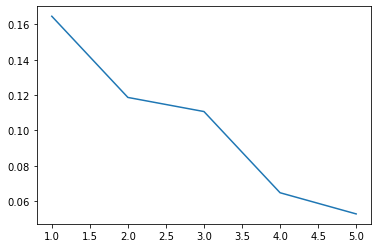

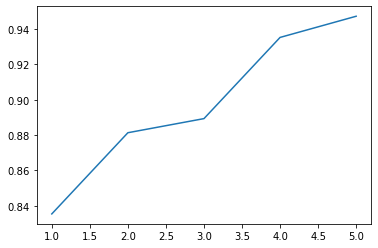

In [58]:
print(liste1)
print(liste2)
print(liste3)
print(liste4)
print(liste5)

nb_of_models = range(1,6)
plt.plot(nb_of_models,score_list)
plt.show()
plt.plot(nb_of_models,execution_time)
plt.show()
plt.plot(nb_of_models,erreur_list)
plt.show()
plt.plot(nb_of_models,precision_list)
plt.show()


In [59]:
execution_time = []
score_list=[]
erreur_list = []
precision_list = []

for solver in ['lbfgs','sgd','adam']:
    score=0
    total_time = 0
    precision = 0
    erreur = 0
    print("-----------",solver,"-----------")
    t0 = time()
    clf1 = MLPClassifier(hidden_layer_sizes=liste1,solver=solver).fit(xtrain, ytrain)
    prediction = clf1.predict(xtest)
    score += clf1.score(xtest, ytest)
    total_time +=time()-t0
    precision+= metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 1", total_time))

    t0 = time()
    clf2 = MLPClassifier(hidden_layer_sizes=liste2,solver=solver).fit(xtrain, ytrain)
    prediction = clf2.predict(xtest)
    score += clf2.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 2", total_time))

    t0 = time()
    clf3 = MLPClassifier(hidden_layer_sizes=liste3,solver=solver).fit(xtrain, ytrain)
    prediction = clf3.predict(xtest)
    score += clf3.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 3", total_time))

    t0 = time()
    clf4 = MLPClassifier(hidden_layer_sizes=liste4,solver=solver).fit(xtrain, ytrain)
    prediction = clf4.predict(xtest)
    score += clf4.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 4", total_time))

    t0 = time()
    clf5 = MLPClassifier(hidden_layer_sizes=liste5,solver=solver).fit(xtrain, ytrain)
    prediction = clf5.predict(xtest)
    score += clf5.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 5", total_time))
    
    erreur_list.append(erreur/5)
    precision_list.append(precision/5)
    execution_time.append(total_time/5)
    score_list.append(score/5)

----------- lbfgs -----------


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score : 0.84
Modèle 1 :	1.88s


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score : 1.7053333333333334
Modèle 2 :	9.74s


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Score : 2.5906666666666665
Modèle 3 :	21.43s
Score : 3.51
Modèle 4 :	28.89s
Score : 4.41
Modèle 5 :	41.18s
----------- sgd -----------


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score : 0.29133333333333333
Modèle 1 :	3.00s
Score : 0.4066666666666667
Modèle 2 :	4.85s
Score : 0.5073333333333333
Modèle 3 :	5.84s
Score : 1.3940000000000001
Modèle 4 :	13.96s
Score : 2.278
Modèle 5 :	27.04s
----------- adam -----------
Score : 0.832
Modèle 1 :	2.59s
Score : 1.7226666666666666
Modèle 2 :	5.45s
Score : 2.6306666666666665
Modèle 3 :	8.85s
Score : 3.5586666666666664
Modèle 4 :	15.76s
Score : 4.476
Modèle 5 :	22.62s


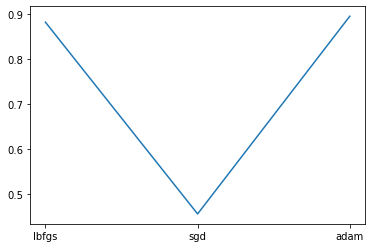

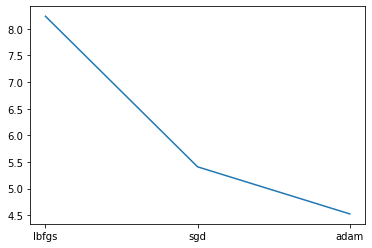

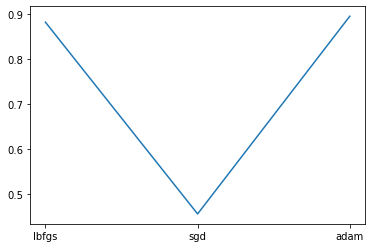

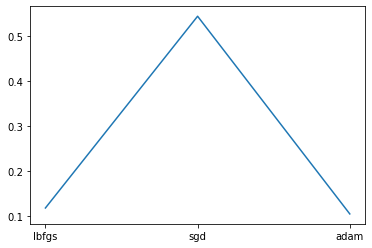

In [60]:
solver=['lbfgs','sgd','adam']
plt.plot(solver,score_list)
plt.show()
plt.plot(solver,execution_time)
plt.show()
plt.plot(solver,precision_list)
plt.show()
plt.plot(solver,erreur_list)
plt.show()

In [61]:
execution_time=[]
score_list=[]
erreur_list=[]
precision_list = []

for activation in ['identity','logistic','tanh','relu']:
    score=0
    total_time=0
    precision = 0
    erreur = 0
    print("-----------",activation,"-----------")
    t0 = time()
    clf1 = MLPClassifier(hidden_layer_sizes=liste1,activation=activation).fit(xtrain, ytrain)
    prediction = clf1.predict(xtest)
    score += clf1.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 1", total_time))

    t0 =time()
    clf2 = MLPClassifier(hidden_layer_sizes=liste2,activation=activation).fit(xtrain, ytrain)
    prediction = clf2.predict(xtest)
    score += clf2.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 2", total_time))

    t0 = time()
    clf3 = MLPClassifier(hidden_layer_sizes=liste3,activation=activation).fit(xtrain, ytrain)
    prediction = clf3.predict(xtest)
    score += clf3.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 3", total_time))

    t0 = time()
    clf4 = MLPClassifier(hidden_layer_sizes=liste4,activation=activation).fit(xtrain, ytrain)
    prediction = clf4.predict(xtest)
    score += clf4.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 4", total_time))

    t0 = time()
    clf5 = MLPClassifier(hidden_layer_sizes=liste5,activation=activation).fit(xtrain, ytrain)
    prediction = clf5.predict(xtest)
    score += clf5.score(xtest, ytest)
    total_time +=time()-t0
    precision += metrics.precision_score(ytest, prediction, average='micro')
    erreur += metrics.zero_one_loss(ytest, prediction)
    print("Score :", score)
    print("%s :\t%.2fs" % ("Modèle 5", total_time))
    
    precision_list.append(precision/5)
    erreur_list.append(erreur/5)
    execution_time.append(total_time/5)
    score_list.append(score/5)
    print(execution_time)
    print(score_list)

----------- identity -----------
Score : 0.8566666666666667
Modèle 1 :	1.13s
Score : 1.7306666666666666
Modèle 2 :	3.01s
Score : 2.598
Modèle 3 :	7.28s
Score : 3.465333333333333
Modèle 4 :	14.87s
Score : 4.319333333333333
Modèle 5 :	21.73s
[4.3466880321502686]
[0.8638666666666666]
----------- logistic -----------
Score : 0.9033333333333333
Modèle 1 :	2.38s
Score : 1.778
Modèle 2 :	9.66s


/home/ballotin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score : 2.614
Modèle 3 :	30.33s
Score : 3.306
Modèle 4 :	49.82s
Score : 3.4213333333333336
Modèle 5 :	54.06s
[4.3466880321502686, 10.81208782196045]
[0.8638666666666666, 0.6842666666666667]
----------- tanh -----------
Score : 0.882
Modèle 1 :	1.13s
Score : 1.758
Modèle 2 :	4.49s
Score : 2.6406666666666667
Modèle 3 :	11.79s
Score : 3.534666666666667
Modèle 4 :	31.09s
Score : 4.379333333333333
Modèle 5 :	37.51s
[4.3466880321502686, 10.81208782196045, 7.501552438735962]
[0.8638666666666666, 0.6842666666666667, 0.8758666666666667]
----------- relu -----------
Score : 0.8466666666666667
Modèle 1 :	3.31s
Score : 1.732
Modèle 2 :	6.33s
Score : 2.6346666666666665
Modèle 3 :	10.05s
Score : 3.564
Modèle 4 :	17.97s
Score : 4.484666666666667
Modèle 5 :	27.10s
[4.3466880321502686, 10.81208782196045, 7.501552438735962, 5.4191490650177006]
[0.8638666666666666, 0.6842666666666667, 0.8758666666666667, 0.8969333333333334]


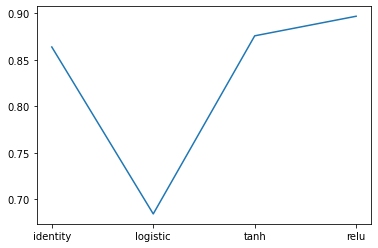

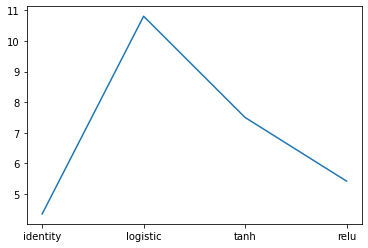

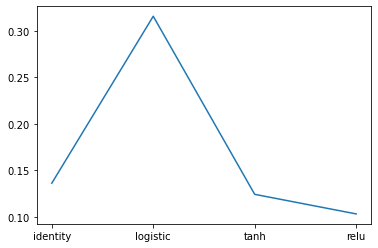

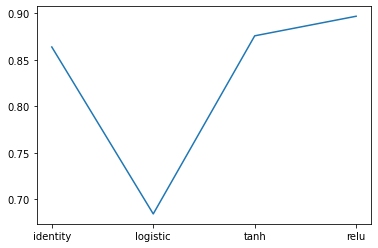

In [62]:
activation=['identity','logistic','tanh','relu']
plt.plot(activation,score_list)
plt.show()
plt.plot(activation,execution_time)
plt.show()
plt.plot(activation,erreur_list)
plt.show()
plt.plot(activation,precision_list)
plt.show()

# TP 3 - Apprentissage par  Machines à Vecteurs  de Support sous sklearn

In [6]:
from sklearn.datasets import fetch_openml
from sklearn import datasets 
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from random import *
from time import time
from sklearn.svm import SVC

In [7]:
mnist = fetch_openml('mnist_784',as_frame=False) 

data = np.random.randint(70000, size=5000)

echantillon=[]
echantillon_target=[]

for i in data:
    echantillon.append(mnist.data[i])
    echantillon_target.append(mnist.target[i])

xtrain,  xtest,  ytrain,  ytest  =  train_test_split(echantillon, echantillon_target, train_size=0.7)

In [8]:
clf1 = SVC(kernel='linear').fit(xtrain,ytrain)
clf2 = SVC(kernel='poly').fit(xtrain,ytrain)
clf3 = SVC(kernel='rbf').fit(xtrain,ytrain)
clf4 = SVC(kernel='sigmoid').fit(xtrain,ytrain)
#clf5 = SVC(kernel='precomputed').fit(xtrain,ytrain)

1.0
0.9086666666666666
0.924
0.8613333333333333


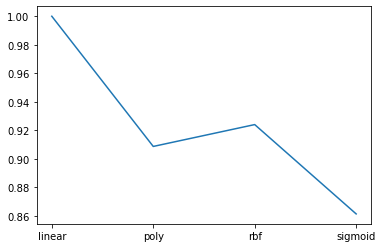

In [9]:
score_list = []
values_of_noyau = ['linear','poly','rbf','sigmoid']
prediction = clf1.predict(xtest)
score_list.append(clf1.score(xtest,prediction))
print(clf1.score(xtest,prediction))

prediction2 = clf2.predict(xtest)
score_list.append(clf2.score(xtest,prediction))

print(clf2.score(xtest,prediction))

prediction3 = clf3.predict(xtest)
score_list.append(clf3.score(xtest,prediction))

print(clf3.score(xtest,prediction))

prediction4 = clf4.predict(xtest)
score_list.append(clf4.score(xtest,prediction))
print(clf4.score(xtest,prediction))

plt.plot(values_of_noyau,score_list)
plt.show()

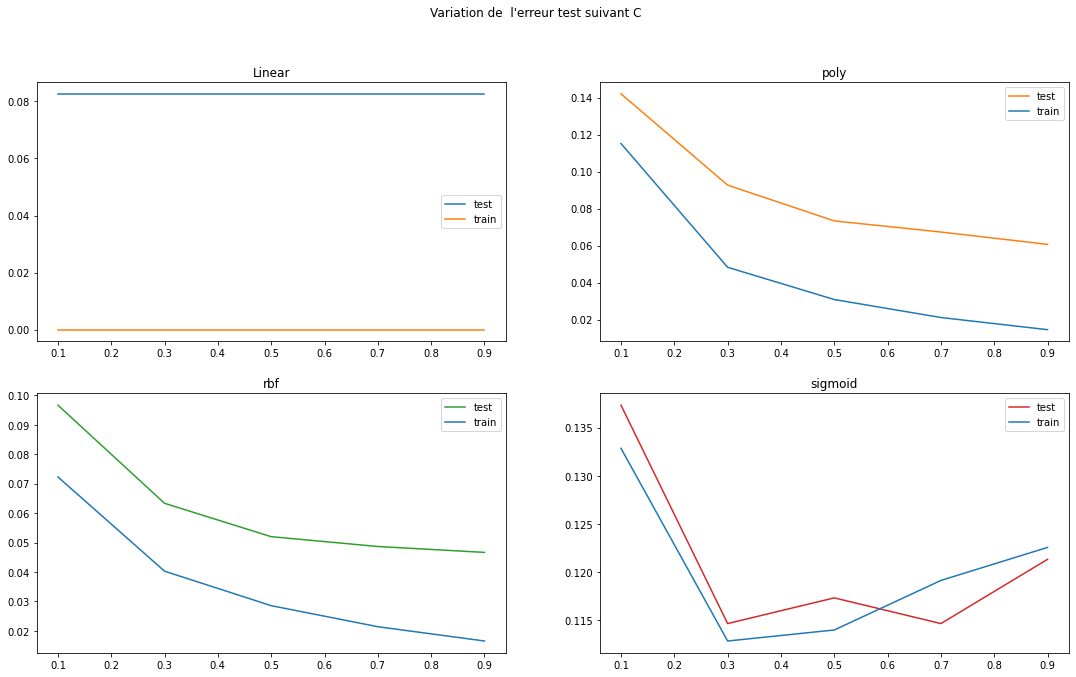

In [67]:
erreur_test_linear=[]
erreur_test_poly=[]
erreur_test_rbf=[]
erreur_test_sigmoid=[]

erreur_train_linear=[]
erreur_train_poly=[]
erreur_train_rbf=[]
erreur_train_sigmoid=[]

score_test_linear=[]
score_test_poly=[]
score_test_rbf=[]
score_test_sigmoid=[]

score_train_linear=[]
score_train_poly=[]
score_train_rbf=[]
score_train_sigmoid=[]

for i in np.arange(0.1,1,0.2):
    clf1 = SVC(kernel='linear',C=i).fit(xtrain,ytrain)
    clf2 = SVC(kernel='poly',C=i).fit(xtrain,ytrain)
    clf3 = SVC(kernel='rbf',C=i).fit(xtrain,ytrain)
    clf4 = SVC(kernel='sigmoid',C=i).fit(xtrain,ytrain)
    
    #print("-----------------","{:.2f}".format(i),"-----------------")
    #print("Score test linear :",clf1.score(xtest,ytest))
    erreur_test_linear.append(1-clf1.score(xtest,ytest))
    erreur_train_linear.append(1-clf1.score(xtrain,ytrain))
    score_test_linear.append(clf1.score(xtest,ytest))
    #print("Score train linear :",clf1.score(xtrain,ytrain))
    
    #print("Score test poly :",clf2.score(xtest,ytest))
    erreur_test_poly.append(1-clf2.score(xtest,ytest))
    erreur_train_poly.append(1-clf2.score(xtrain,ytrain))
    #print("Score train poly :",clf2.score(xtrain,ytrain))
    
    #print("Score test rbf :",clf3.score(xtest,ytest))
    erreur_test_rbf.append(1-clf3.score(xtest,ytest))
    erreur_train_rbf.append(1-clf3.score(xtrain,ytrain))
    #print("Score train rbf :",clf3.score(xtrain,ytrain))
    
    #print("Score test sigmoid :",clf4.score(xtest,ytest))
    erreur_test_sigmoid.append(1-clf4.score(xtest,ytest))
    erreur_train_sigmoid.append(1-clf4.score(xtrain,ytrain))
    #print("Score train sigmoid :",clf4.score(xtrain,ytrain))

    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Variation de  l'erreur test suivant C")
ax1.plot(np.arange(0.1,1,0.2),erreur_test_linear, label='test')
ax1.plot(np.arange(0.1,1,0.2), erreur_train_linear, label='train')
ax1.legend()
ax1.set_title('Linear')

ax2.plot(np.arange(0.1,1,0.2), erreur_test_poly, 'tab:orange', label='test')
ax2.plot(np.arange(0.1,1,0.2), erreur_train_poly, label='train')
ax2.set_title('poly')
ax2.legend()

ax3.plot(np.arange(0.1,1,0.2), erreur_test_rbf, 'tab:green', label='test')
ax3.plot(np.arange(0.1,1,0.2), erreur_train_rbf, label='train')
ax3.set_title('rbf')
ax3.legend()

ax4.plot(np.arange(0.1,1,0.2), erreur_test_sigmoid, 'tab:red', label='test')
ax4.plot(np.arange(0.1,1,0.2), erreur_train_sigmoid, label='train')
ax4.legend()
ax4.set_title('sigmoid')

fig.set_size_inches(18.5,10.5, forward = True)
plt.savefig('courbes_test_train.png')

In [68]:
from sklearn.metrics import confusion_matrix
ypred = clf.predict(xtest)
cm = confusion_matrix(ytest, ypred) 
print(cm)

[[147   0   0   0   0   1   3   0   2   0]
 [  0 171   1   1   0   0   0   2   5   1]
 [  1   0 123   2   0   0   2   0   9   1]
 [  0   0   2 132   0   1   1   1  11   0]
 [  0   1   0   0 127   0   0   0   1  10]
 [  1   0   0   3   0  94   1   0  14   4]
 [  3   0   0   0   0   4 144   0   2   0]
 [  1   1   0   4   3   2   0 144   4   8]
 [  0   2   1   1   1   1   0   0 147   2]
 [  1   1   0   0   8   0   0   3   1 135]]


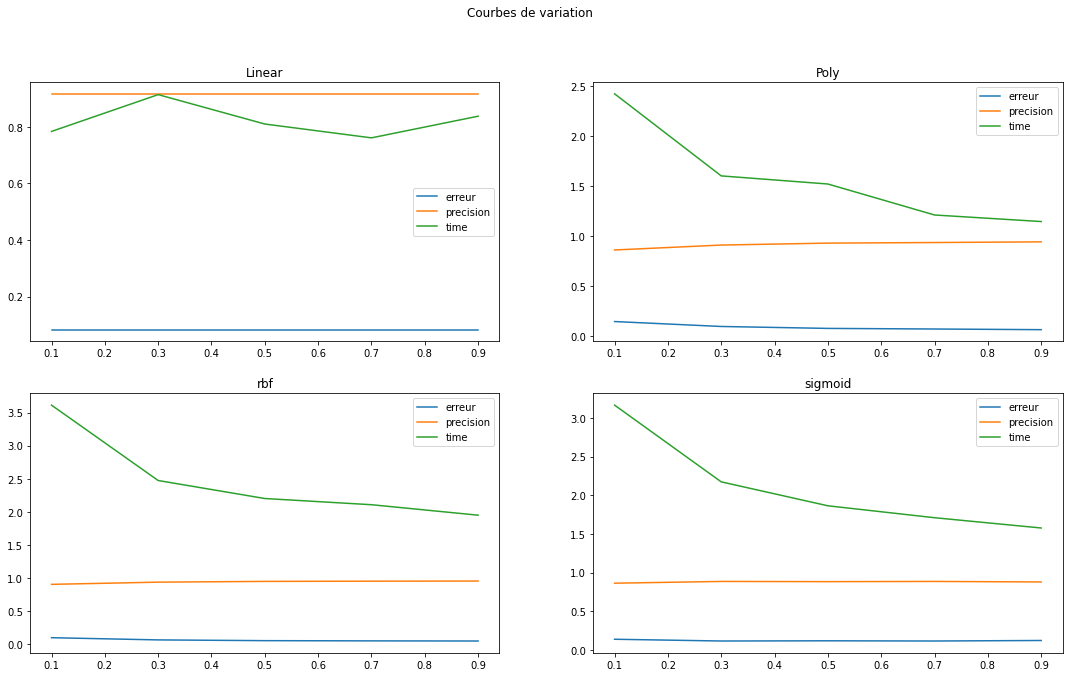

In [69]:
erreur_linear=[]
erreur_poly=[]
erreur_rbf=[]
erreur_sigmoid=[]

precision_linear=[]
precision_poly=[]
precision_rbf=[]
precision_sigmoid=[]

time_linear=[]
time_poly=[]
time_rbf=[]
time_sigmoid=[]

for i in np.arange(0.1,1,0.2):
    
    t0 = time()
    clf1 = SVC(kernel='linear',C=i).fit(xtrain,ytrain)
    prediction1 = clf1.predict(xtest)
    time_linear.append(time()-t0)
    precision_linear.append(metrics.precision_score(ytest, prediction1, average='micro'))
    erreur_linear.append(metrics.zero_one_loss(ytest, prediction1))
    
    t0 = time()
    clf2 = SVC(kernel='poly',C=i).fit(xtrain,ytrain)
    prediction2 = clf2.predict(xtest)
    time_poly.append(time()-t0)
    precision_poly.append(metrics.precision_score(ytest, prediction2, average='micro'))
    erreur_poly.append(metrics.zero_one_loss(ytest, prediction2))
    
    t0 = time()
    clf3 = SVC(kernel='rbf',C=i).fit(xtrain,ytrain)
    prediction3 = clf3.predict(xtest)
    time_rbf.append(time()-t0)
    precision_rbf.append(metrics.precision_score(ytest, prediction3, average='micro'))
    erreur_rbf.append(metrics.zero_one_loss(ytest, prediction3))
    
    t0 = time()
    clf4 = SVC(kernel='sigmoid',C=i).fit(xtrain,ytrain)
    prediction4 = clf4.predict(xtest)
    time_sigmoid.append(time()-t0)
    precision_sigmoid.append(metrics.precision_score(ytest, prediction4, average='micro'))
    erreur_sigmoid.append(metrics.zero_one_loss(ytest, prediction4))


    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Courbes de variation")
ax1.plot(np.arange(0.1,1,0.2),erreur_linear, label='erreur')
ax1.plot(np.arange(0.1,1,0.2), precision_linear, label='precision')
ax1.plot(np.arange(0.1,1,0.2), time_linear, label='time')
ax1.legend()
ax1.set_title('Linear')

ax2.plot(np.arange(0.1,1,0.2),erreur_poly, label='erreur')
ax2.plot(np.arange(0.1,1,0.2), precision_poly, label='precision')
ax2.plot(np.arange(0.1,1,0.2), time_poly, label='time')
ax2.legend()
ax2.set_title('Poly')

ax3.plot(np.arange(0.1,1,0.2), erreur_rbf, label='erreur')
ax3.plot(np.arange(0.1,1,0.2), precision_rbf, label='precision')
ax3.plot(np.arange(0.1,1,0.2), time_rbf, label='time')
ax3.set_title('rbf')
ax3.legend()

ax4.plot(np.arange(0.1,1,0.2), erreur_sigmoid, label='erreur')
ax4.plot(np.arange(0.1,1,0.2), precision_sigmoid, label='precision')
ax4.plot(np.arange(0.1,1,0.2), time_sigmoid, label='time')
ax4.legend()
ax4.set_title('sigmoid')

fig.set_size_inches(18.5,10.5, forward = True)
plt.savefig('courbes_finales.png')